# Practical work 2 : Fourier transform

Student: Youcef Benslimane N°: 28715654

This practial work is dedicated to the study of the discrete Fourier transform applied on the two following images:
![son.png](./img/son.png)
![sonrot.png](./img/sonrot.png)
and analyze the properties of their spectrum. To this end, we make use of the following functions provided by the module `numpy.fft`:

- `fft2()` to compute the Fourier transform on an image
- `fftshift()` to center the low frequencies
- `abs()` (from `numpy`) to compute the module of a complexe array

In most of cases, high frequencies have lower energy compare to low frequencies. We will use a logarithmic scale by applying $\log(1+abs(TF))$ to display the spectrum.

In [53]:
import numpy as np
from numpy.fft import fft2,fftshift
from PIL import Image
import math
son = 255.*np.array(Image.open("Img/son.png"))
print(son)
sonrot = np.array(Image.open('img/sonrot2.png'))
print(sonrot)

[[255. 255. 255. ... 255. 255. 255.]
 [255. 255. 255. ... 255. 255. 255.]
 [255. 255. 255. ... 255. 255. 255.]
 ...
 [255. 255. 255. ... 255. 255. 255.]
 [255. 255. 255. ... 255. 255. 255.]
 [255. 255. 255. ... 255. 255. 255.]]
[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]


## Exercice: properties of Fourier transform applied on natural images
1. Write the following functions:
 - `computeFT(I)` returning the Fourier transform of image `I`,
 - `toVisualizeFT(If)` returning the centered module of a complex array `If` (the Fourier transform of an image),
 - `toVisualizeLogFT(If)` similar to the previous function but use a logarithmic scale.

In [54]:
def computeFT(I):
    """ Array -> Array[complex] """
    return fft2(I)

def toVisualizeFT(If):
    """ Array[complex] -> Array[float] """
    return np.abs(fftshift(If))

def toVisualizeLogFT(If):
    """ Array[complex] -> Array[float] """
    return np.log(1+np.abs(fftshift(If)))


2. Write a series of instructions that
 - compute the Fourier transform of `son` and `sonrot`,
 - compute and display the module using a logarithmic scale,
 - threshold the module with a parameter of $1.10^5$ (use the function of TME1)
 - display the thresholded spectrum

In [55]:
def thresholdImage(I,s):
    """ Array*int -> Array """
    L = I.copy()
    L = np.where(L < s, 0, 255)
    return L

def displayImage(I):
    plt.figure()
    plt.imshow(I)
    plt.show()

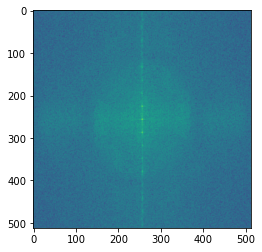

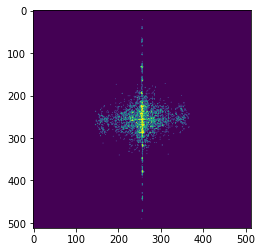

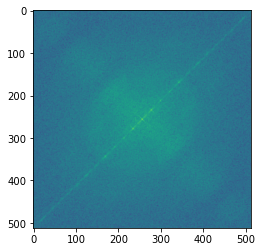

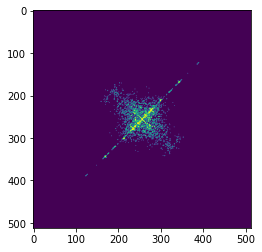

In [56]:
import matplotlib.pyplot as plt

# your code below

#Fourier Transform of son
ftSon = computeFT(son)

#Centered Module of ftSon using Logarithmic Scale
modSonLog = toVisualizeLogFT(ftSon)
displayImage(modSonLog)

#Thresholded Module
modSon = toVisualizeFT(ftSon)
modSonThresholded = thresholdImage(modSon,1e5)
displayImage(modSonThresholded)
#--------------------------------------------------------
#Fourier Transform of sonrot
ftSonrot = computeFT(sonrot)

#Centered Module of ftSonRot using Logarithmic Scale
modSonrotLog = toVisualizeLogFT(ftSonrot)
displayImage(modSonrotLog)

#Thresholded Module
modSonrot = toVisualizeFT(ftSonrot)
modSonrotThresholded = thresholdImage(modSonrot,1e5)
displayImage(modSonrotThresholded)

3. Interpretation: discuss the results obtained on thresholded FT module. What property of the Fourier transform is shown ?

The property shown here is rotation. When we thresholded the FT module, the fourier transform changed as the image did. The rotation angle and the direction are preserved.

4. Write the function `blend()` getting two images, one float parameter $\alpha\in[0,1]$, calculating $\alpha I_1+(1-\alpha)I_2$ and returning the result. 

In [57]:
def blend(I1,I2,alpha):
    """ Array**2*float -> Array """
    return alpha*I1 + (1-alpha)*I2


5. Apply the previous function on images `son` and `sonrot` and $\alpha=\frac12$, compute the Fourier transform, threshold the module and visualize the result. 

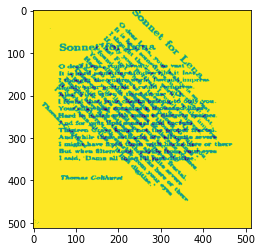

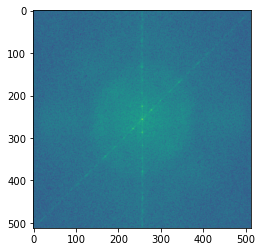

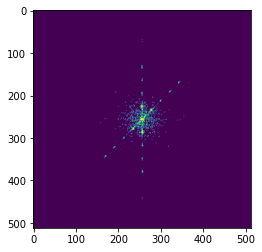

In [58]:
#blend and display the new image
newImg = blend(son, sonrot, 0.5)
displayImage(newImg)

#Compute the FT of the new image and visualise its module on logarithmic scale
newImgFT = computeFT(newImg)
newImgModLog = toVisualizeLogFT(newImgFT)
displayImage(newImgModLog)

#Compute the module and visualize it
newImgFTMod = toVisualizeFT(newImgFT)
newImgFTModThresholded = thresholdImage(newImgFTMod, 1e5)
displayImage(newImgFTModThresholded)

6. Compare the latter result with those of question 2: what property of the Fourier transform is shown? What is the behaviour of $\alpha$ in the resulting spectrum?

The new image is a linear combination from two images, Z = X + Y, with a weight vector ($\alpha$,(1-$\alpha$)).
Hence, the new Fourier transform is also a linear combination of the FTs of the two images: FT(Z) = $\alpha$FT(X) + (1-$\alpha$)FT(Y). The spectrum displayed is its module, so the same rule applies: the initial spectres are summed out.

The $\alpha$ coefficient determines the visibilty of the images. When $\alpha$ = 0, the second image (sonrot) is displayed and not the first. When $\alpha$ = 0.5, both images are displayed. When $\alpha$ = 1, only the first image is displayed.

7. We want to determine the text orientation in image `sonrot` and produce a new image with horizontal text. Write the function `rectifyOrientation()` that:

 + computes the FT module of image given in parameter and threshold it at $3\times 10^{5}$,
 + from thresholded module determines the main orientation using the function `mainOrientation()` 
 + produces the rectified image applying a rotation with a suitable angle using `rotateImage()`

In [59]:
def mainOrientation(I):
    """ Array -> tuple[Iori,float]
        return image of orientation (32 bins) and the main orientation (degree) from a Fourier transform module
    """
    n, m = I.shape

    size = 32
    x = np.array(range(size))
    ori = np.vstack((np.cos(np.pi*x/size), np.sin(np.pi*x/size))).T

    Iori = np.zeros((n, m))
    orients = np.zeros((size))

    for i in range(1,n+1):
        for j in range(1,m+1):
            if I[i-1, j-1] > 0:
                v = np.array([j-m/2, -i + n/2])
                if i > n/2:
                    v = -v
                    prod = np.matmul(ori, v)
                    maxi = prod.max()
                    if maxi > 0:
                        imax = np.nonzero(prod == maxi)
                        Iori[i-1, j-1] = imax[0]
                        orients[imax] += 1

    maxori = np.nonzero(orients == orients.max())[0][0]
    return (Iori, 180*maxori/size - 90)

def rotateImage(I,a):
    """ Array*float -> Array 
        return a rotation of angle a (degree) of image I
    """
    return np.array(Image.fromarray(I).rotate(a, expand=True, fillcolor=127))

####### your code below

def rectifyOrientation(I):
    iFT = computeFT(I)
    iModule = toVisualizeFT(iFT)
    iModuleThresholded = thresholdImage(iModule, 3e5)
    II, rot = mainOrientation(iModuleThresholded)
    print('Test result: Rectified with angle: ', rot, '°')
    rotatedI = rotateImage(I, -rot)
    return rotatedI
    

8. Experiment `rectifyOrientation()` on `sinrot`, and on a rotation of `img/port.jpg` (using `rotateImage()`) with various rotation angles.  

Test result: Rectified with angle:  -45.0 °


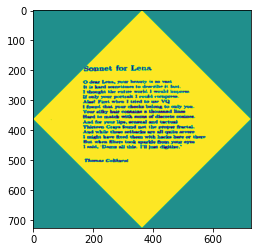

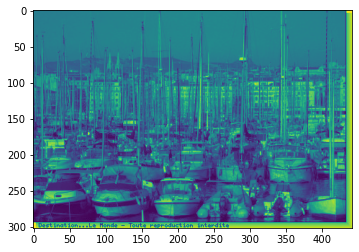

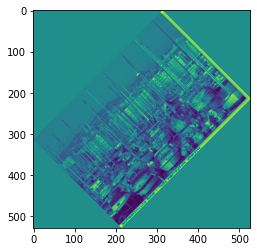

Test result: Rectified with angle:  45.0 °


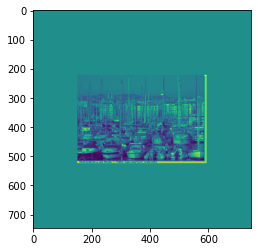

In [60]:
#Rectify sonrot rotation
sonrotRectified = rectifyOrientation(sonrot)
displayImage(sonrotRectified)

#Experimentations on port.jpg!

#Display port.jpg
port = np.array(Image.open('img/port.jpg'))
displayImage(port)

#Change rotation
portRot = rotateImage(port, 45)
displayImage(portRot)

#Rectify portRot rotation
portRotRectified = rectifyOrientation(portRot)
displayImage(portRotRectified)



In [61]:
def experimentOnRotation(I, angle):
    IRot = rotateImage(I, angle)
    print('Test: Rotated by ', angle, '°:')
    displayImage(IRot)
    IRotRectified = rectifyOrientation(IRot)
    displayImage(IRotRectified)

Test: Rotated by  90 °:


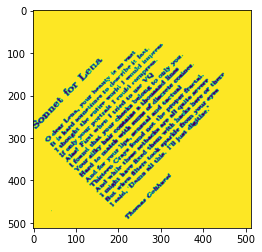

Test result: Rectified with angle:  45.0 °


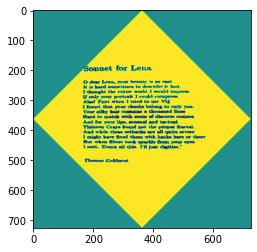

Test: Rotated by  120 °:


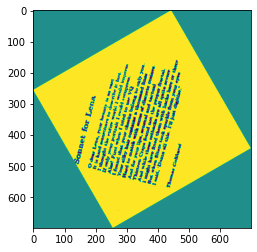

Test result: Rectified with angle:  73.125 °


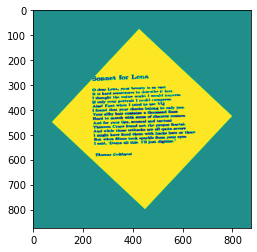

Test: Rotated by  40 °:


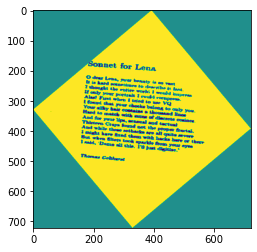

Test result: Rectified with angle:  -5.625 °


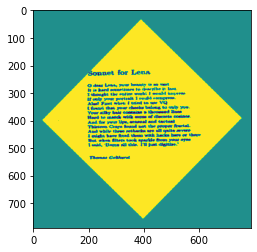

In [62]:
#We're gonna use here the function 'experimentOnRotation' to test various angle on sonrot.jpg and port.jpg

#Let's start with sonrot.jpg
experimentOnRotation(sonrot, 90)
experimentOnRotation(sonrot, 120)
experimentOnRotation(sonrot, 40)

Test: Rotated by  270 °:


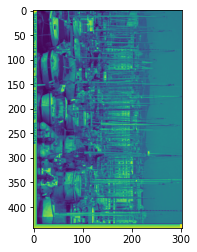

Test result: Rectified with angle:  84.375 °


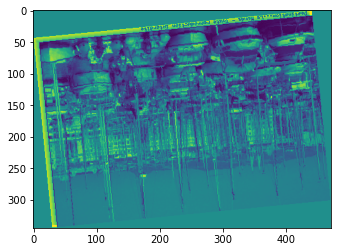

Test: Rotated by  66 °:


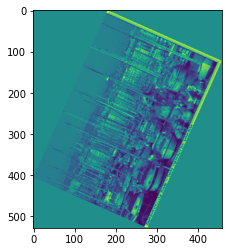

Test result: Rectified with angle:  61.875 °


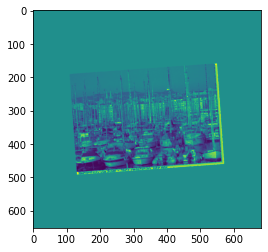

Test: Rotated by  130 °:


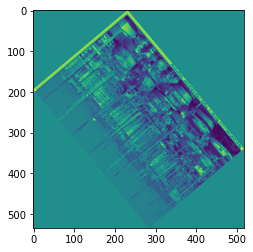

Test result: Rectified with angle:  -45.0 °


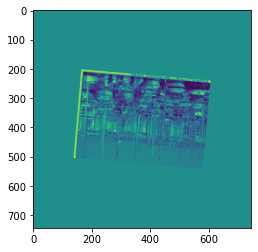

In [63]:
#Let's experiment on port.jpg
experimentOnRotation(port, 270)
experimentOnRotation(port, 66)
experimentOnRotation(port, 130)

It seems that the program isn't 100% accurate as there are some margine errors. And it also seems that it doesn't differ between the top and the bottom of the images